# L2: Text classification

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [2]:
import pandas as pd
import bz2

with bz2.open("speeches-201718.json.bz2") as source:
    speeches_201718 = pd.read_json(source)

with bz2.open("speeches-201819.json.bz2") as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [2]:
speeches_201718.head()

,id,party,words
0,H5-002-004,S,eders majestäter eders kungliga högheter herr ...
1,H5-003-001,V,aktuell debatt om situationen för ensamkommand...
2,H5-003-002,S,herr talman och ledamöter jag vill börja med a...
3,H5-003-003,M,herr talman åhörare den här debatten handlar a...
4,H5-003-004,SD,herr talman ansvar och rättssäkerhet är två or...


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [3]:
training_data, test_data = speeches_201718, speeches_201819

For later reference, we store the sorted list of party abbreviations.

In [4]:
parties = sorted(training_data["party"].unique())
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


## Problem 1: Visualization

Your first task is to **get to know the data** better by plotting a simple **visualization**.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to **compare** the two **data frames with respect to the distribution of the speeches over the different parties**. Write code to **generate two bar plots** that visualize this information, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and **compare** them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

In [12]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [7]:
# plot barplot 
speeches_201718.head()

,id,party,words
0,H5-002-004,S,eders majestäter eders kungliga högheter herr ...
1,H5-003-001,V,aktuell debatt om situationen för ensamkommand...
2,H5-003-002,S,herr talman och ledamöter jag vill börja med a...
3,H5-003-003,M,herr talman åhörare den här debatten handlar a...
4,H5-003-004,SD,herr talman ansvar och rättssäkerhet är två or...


In [8]:
speeches_201718.count()
# list 12.343 speaches 

id       12343
party    12343
words    12343
dtype: int64

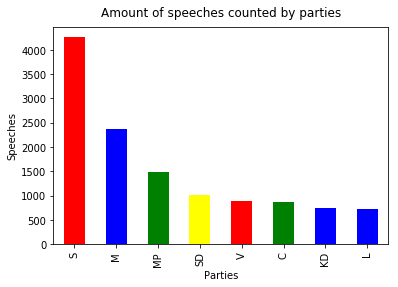

In [10]:
# creating a test plot
#import matplotlib.pyplot as plt

speeches_201718["party"].value_counts().plot(kind='bar', 
                                             color = ("red", "blue", "green", "yellow","red", "green", "blue", "blue"))
plt.xlabel("Parties")
plt.ylabel("Speeches")
plt.title("Amount of speeches counted by parties", y=1.02);

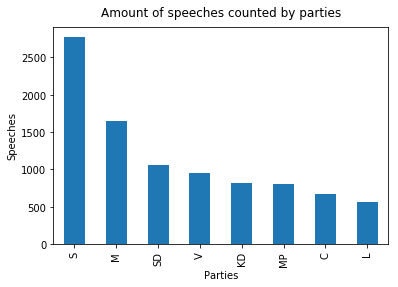

In [21]:
# creating a test plot
speeches_201819["party"].value_counts().plot(kind='bar')
plt.xlabel("Parties")
plt.ylabel("Speeches")
plt.title("Amount of speeches counted by parties", y=1.02);

**Interpretation**

We can see that all the parties "S" & "M" have made fewer speeches. The rest of the games have made as many speeches as last year. 
Furthermore, the ranking is very similar to last year. However, the party "MP" ranked 3rd on rank 6 and "KD" moved up two places to 5, with a similar number of speeches as last year.

## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. **vectorize** the speeches in the training data
2. **instantiate and fit** the Naive Bayes model
3. **evaluate** the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the **evaluation** you can use the **function** [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report *per-class precision, recall and F1, as well as overall accuracy*.

In [11]:
# TODO: Write code here to train and evaluate a Multinomial Naive Bayes classifier

# check training data
training_data

,id,party,words
0,H5-002-004,S,eders majestäter eders kungliga högheter herr ...
1,H5-003-001,V,aktuell debatt om situationen för ensamkommand...
2,H5-003-002,S,herr talman och ledamöter jag vill börja med a...
3,H5-003-003,M,herr talman åhörare den här debatten handlar a...
4,H5-003-004,SD,herr talman ansvar och rättssäkerhet är två or...
5,H5-003-005,MP,herr talman jag inleder med att tacka vänsterp...
6,H5-003-006,C,herr talman vi debatterar i dag situationen fö...
7,H5-003-007,V,herr talman runt om i landet på torg och i kla...
8,H5-003-008,L,aktuell debatt om situationen för ensamkommand...
9,H5-003-009,KD,herr talman det råder ingen tvekan om att situ...


In [36]:
# needed libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Step 1 & 2 in pipeline
# Step 1: vectorize speeches of train data
# Step 2: instantiate and fit Bayes model
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
])



In [37]:
X_train = training_data["words"]
y_train = training_data["party"]

# fit the model
text_clf.fit(X_train, y_train)

# make prediction
predicted = text_clf.predict(test_data["words"])

In [203]:
# check predictions
print(predicted)
np.unique(predicted)

['S' 'S' 'S' ... 'S' 'S' 'S']


array(['M', 'S'], dtype='<U2')

** Interpretation of prediction**

The created model does predict just two classes/parties: "M" & "S"

Which are by far the parties with most speeches.

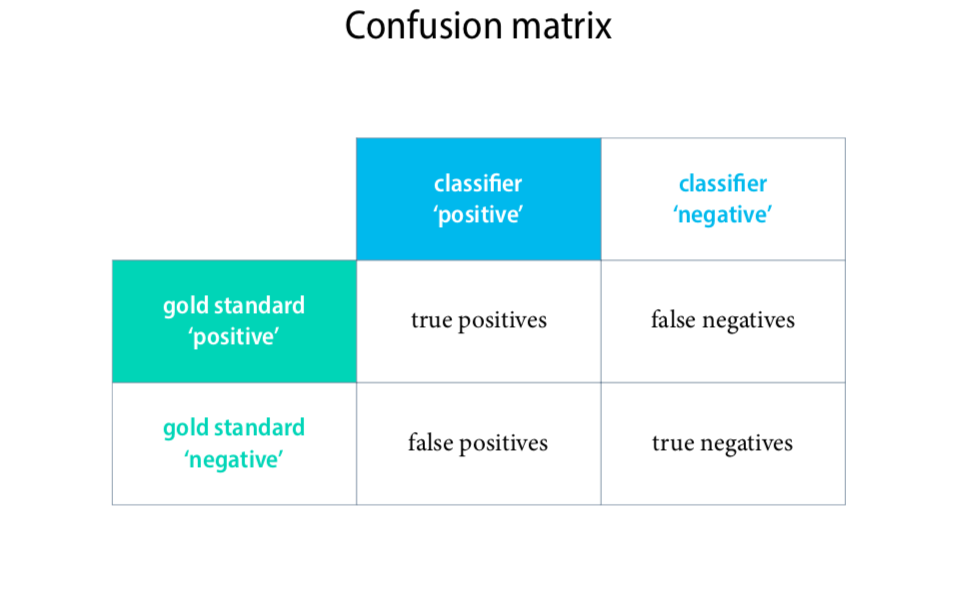

In [33]:
from IPython.display import Image
Image(filename = "ConfusionMatrix.png", width=600, height=600)

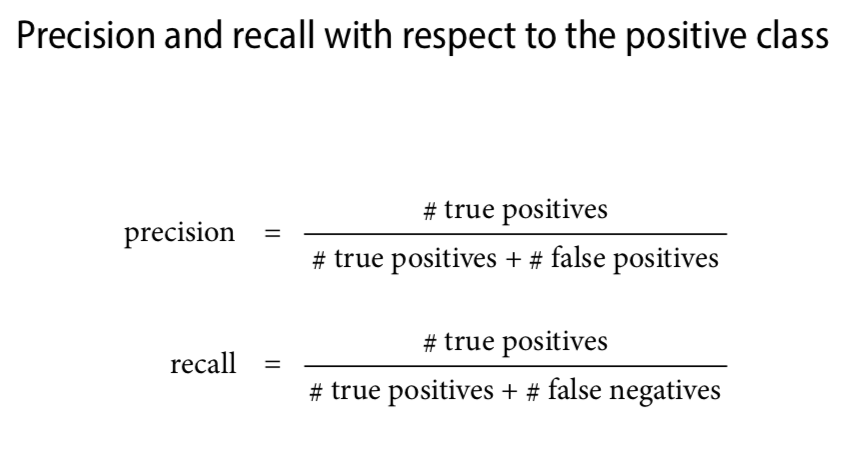

In [34]:
from IPython.display import Image
Image(filename = "PrecisionRecallPositiveCase.png", width=600, height=600)

**Precision** attempts to *answer* the *following question*:

**What proportion of positive identifications was actually correct?**

**Recall** attempts to *answer* the *following question*:

**What proportion of actual positives was identified correctly?**

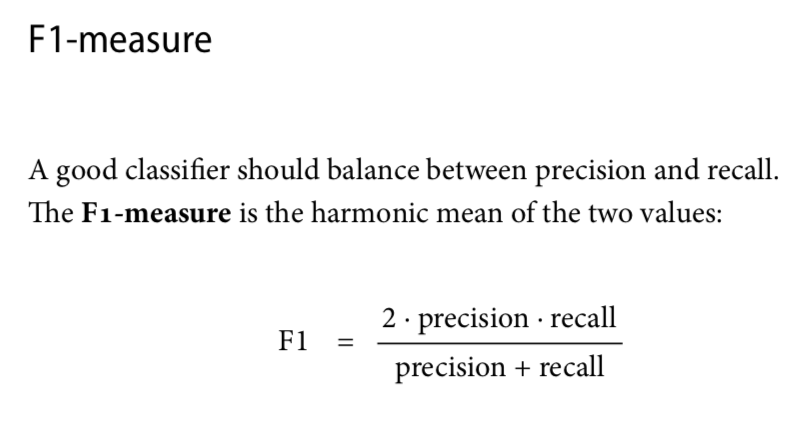

In [35]:
from IPython.display import Image
Image(filename = "F1-measure.png", width=600, height=600)

In [210]:
# Step 3: Evaluate model
# use classification report - precision, recall, F1 score, overfall accuracy
import numpy as np
accuracy_P2 = round(np.mean(predicted == test_data["party"]),3)
print("The accuracy of the Naive Bayes classifier with default parameter is: {}".format(accuracy_P2))

The accuracy of the Naive Bayes classifier with default parameter is: 0.299


In [39]:
from sklearn.metrics import classification_report
print(classification_report(test_data["party"], 
                                    predicted,
                                    target_names=parties))

             precision    recall  f1-score   support

          C       0.00      0.00      0.00       671
         KD       0.00      0.00      0.00       821
          L       0.00      0.00      0.00       560
          M       0.50      0.00      0.00      1644
         MP       0.00      0.00      0.00       809
          S       0.30      1.00      0.46      2773
         SD       0.00      0.00      0.00      1060
          V       0.00      0.00      0.00       950

avg / total       0.18      0.30      0.14      9288



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Would you have expected the results that you got?

I didn't expect these results! In the visual analysis I noticed that the parties in the training data had a higher frequency, but I would not have thought that the effects on the classifier would be so drastic. 
However, no statement can be made at this stage as to whether the classification of the model is good or bad. For this it would have to be compared with another model.

## Problem 3: Baseline

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. *When other classifiers are not available*, a *simple baseline* for text classification is **Most Frequent Class (MFC)**. One way to think of this baseline is as a classifier that, for every document, predicts that class which appears most often in the training data.

**Determine the most frequent class in the 2017/2018 data**. What is the **accuracy** of the MFC baseline on the **test data**? Given this baseline accuracy, how do you assess the results of the Naive Bayes classifier from Problem&nbsp;2? Answer with a short text.

In [90]:
# TODO: Write code here to print the baseline accuracy
Most_frequent_class = training_data["party"].value_counts()
print(Most_frequent_class)

S     4261
M     2370
MP    1481
SD    1010
V      894
C      865
KD     743
L      719
Name: party, dtype: int64


In [213]:
# baseline prediction means to make every prediction as the most frequent class
# Above we see the most frequent class is S with 4261 speeches
# Therefor do we predict S for every case

baseline_pred = np.repeat("S",len(test_data))
print(baseline_pred)
accuracy_P3 = round(np.mean(baseline_pred == test_data["party"]),3)

print("The accuracy of the Most Frequent Class is: {}".format(accuracy_P3))

['S' 'S' 'S' ... 'S' 'S' 'S']
The accuracy of the Most Frequent Class is: 0.299


In [95]:
print(classification_report(test_data["party"], 
                                    baseline_pred,
                                    target_names=parties))

             precision    recall  f1-score   support

          C       0.00      0.00      0.00       671
         KD       0.00      0.00      0.00       821
          L       0.00      0.00      0.00       560
          M       0.00      0.00      0.00      1644
         MP       0.00      0.00      0.00       809
          S       0.30      1.00      0.46      2773
         SD       0.00      0.00      0.00      1060
          V       0.00      0.00      0.00       950

avg / total       0.09      0.30      0.14      9288



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Interpretation**

We can see that the accuracy is the same as with the Naive Bayes claissifier. Also the precision and recall values for "S" are the same. So not the case for "M" because there is no classification for this party. Accordingly the avg precision is lower than in problem 3.

## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one **randomly removes samples from over-represented classes until all classes are represented with the same number of samples**.

Implement undersampling to **create a balanced subset** of the **training data**. **Rerun** the **evaluation from Problem&nbsp;2** on the **balanced data and compare** the results. **Discuss** your **findings** in a short text. Would you argue that undersampling make sense for the task of predicting the party of a speaker?

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [99]:
# TODO: Write code here to implement undersampling
print(Most_frequent_class)
# to have a balanced data set, we see the party "L" with the lowerst speeches
# if we want to balance the dataset, we can max sample 719 speeches of each party

# we have 8 parties and a balanced dataset has 719 speeches of each party
print(719*8)
# this makes 5752 speeches as in the hint given

S     4261
M     2370
MP    1481
SD    1010
V      894
C      865
KD     743
L      719
Name: party, dtype: int64
5752


In [227]:
# init empty dataset - balanced data set
balanced_data = pd.DataFrame()
# Class count
count_class_S, count_class_M, count_class_MP ,count_class_SD, count_class_V, count_class_C, count_class_KD, count_class_L = training_data.party.value_counts()
for i in parties:
    
    # Divide by class
    df_class = training_data[training_data['party'] == i]
    
    # take a sample of length L (smallest elemnt)
    df_under = df_class.sample(count_class_L)
    # save new sample in df
    balanced_data = balanced_data.append(df_under)

In [226]:
# I don´t want to have them in a party order, therefor I shuffle the data frame
from sklearn.utils import shuffle
balanced_data = shuffle(balanced_data)
balanced_data

,id,party,words
2789,H5-039-058,KD,herr talman i dag debatterar vi rikets styrels...
7297,H5-082-008,L,herr talman jag ska börja med ett mejl från en...
7096,H5-080-078,M,herr talman om en forskare vill bedriva forskn...
869,H5-015-122,KD,herr talman vi kommer ju att ta varandra i han...
6780,H5-077-005,M,herr talman tack så mycket för frågorna det va...
3352,H5-044-054,SD,fru talman jag yrkar bifall till reservationen...
9029,H5-101-121,V,civila samhället inklusive trossamfund herr ta...
3303,H5-044-005,M,herr talman sanningen är att under alliansens ...
4726,H5-054-105,MP,svar på interpellationer fru talman ledamoten ...
11721,H5-132-086,KD,herr talman jag tänkte att jan lindholms sista...


In [230]:
# check if the dataset is balanced now
print(balanced_data["party"].value_counts())
print(balanced_data.count())

L     719
KD    719
SD    719
V     719
S     719
M     719
MP    719
C     719
Name: party, dtype: int64
id       5752
party    5752
words    5752
dtype: int64


In [216]:
## I copy pasted the whole code section of problem 2 in this cell

# Step 1: vectorize speeches of train data
# Step 2: instantiate and fit Bayes model
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
])
X_train_balanced = balanced_data["words"]
y_train_balanced = balanced_data["party"]

# fit the model
text_clf.fit(X_train_balanced , y_train_balanced)

# make prediction
predicted_balanced = text_clf.predict(test_data["words"])
pred_parties = np.unique(predicted_balanced)
print("The parties predicted: {}".format(pred_parties))
print("The prediction includes {} parties.".format(len(pred_parties)))

# Step 3: Evaluate model
# use classification report - precision, recall, F1 score, overfall accuracy
mean_pred_balanced = round(np.mean(predicted_balanced == test_data["party"]),3)
print("The accuracy of the balanced data set is: {}".format(mean_pred_balanced))
print(classification_report(test_data["party"], 
                                    predicted_balanced,
                                    target_names=parties))

The parties predicted: ['C' 'KD' 'L' 'M' 'MP' 'S' 'SD' 'V']
The prediction includes 8 parties.
The accuracy of the balanced data set is: 0.355
             precision    recall  f1-score   support

          C       0.26      0.39      0.31       671
         KD       0.22      0.46      0.30       821
          L       0.26      0.42      0.32       560
          M       0.36      0.44      0.39      1644
         MP       0.34      0.33      0.34       809
          S       0.82      0.21      0.33      2773
         SD       0.45      0.32      0.37      1060
          V       0.35      0.55      0.43       950

avg / total       0.48      0.35      0.35      9288



Discuss your findings in a short text. Would you argue that undersampling make sense for the task of predicting the party of a speaker?

The first thing to notice is that after the undersampling not only the party S and M were predicted, but all parties. 
Also the accuracy of the prediction has improved to 0.355. All other evaluation scores also improved.

**Accordingly it can be said that undersampling helped to improve prediction.**

## Problem 5: Confusion matrix

A **confusion matrix** is a specific table layout that is **useful** when **analysing** the **performance of** a **classifier**. In this matrix, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with **gold-standard class** $i$ was predicted as belonging to class $j$.

In scitkit-learn, the **confusion matrix** of a classifier is computed by the **function** [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Your task is to use the confusion matrix to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses $p$ with when it predicts the party of a speaker.

Discuss your findings in a short text. Would you argue that undersampling make sense for the task of predicting the party of a speaker

In [ ]:
# TODO: Write code here to solve Problem 5
from sklearn.metrics import confusion_matrix

In [150]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[259 109  50 121  33   6  31  62]
 [ 72 377  46 171  31  17  34  73]
 [ 57  69 235  70  25   5  19  80]
 [185 310 134 716  68  26  89 116]
 [ 71 121  50  97 266  56  37 111]
 [187 422 200 526 297 582 154 405]
 [ 93 187 126 158  33   7 337 119]
 [ 57 120  46 123  26  13  41 524]]


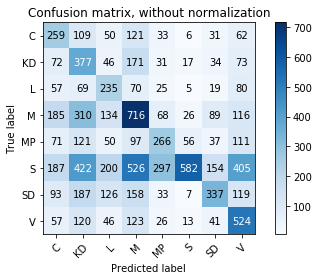

In [152]:
plot_confusion_matrix(test_data["party"], predicted_balanced, classes = parties)
plt.show()

** Interpretation **

The Columns represent the prediction and the rows the true values. 
The higher the number, the darker the value, this helps to get an overview faster. 
The diagonal represents **true positive** values, which is generally the darkest colored. 
We're supposed to find out where the most common confusion occurred, so we're interested in dark fields that aren't in the diagonal. 
**It can be seen that the prediction of M when the classification was actually S was most often wrong.**
In general, S was often not classified correctly. 

Normalized confusion matrix
[[0.38599106 0.16244411 0.07451565 0.18032787 0.04918033 0.00894188
  0.0461997  0.0923994 ]
 [0.08769793 0.4591961  0.05602923 0.20828258 0.03775883 0.02070646
  0.04141291 0.08891596]
 [0.10178571 0.12321429 0.41964286 0.125      0.04464286 0.00892857
  0.03392857 0.14285714]
 [0.11253041 0.18856448 0.08150852 0.43552311 0.04136253 0.01581509
  0.05413625 0.07055961]
 [0.08776267 0.14956737 0.0618047  0.11990111 0.32880099 0.06922126
  0.04573548 0.13720643]
 [0.06743599 0.15218175 0.07212405 0.18968626 0.10710422 0.209881
  0.05553552 0.14605121]
 [0.08773585 0.17641509 0.11886792 0.1490566  0.03113208 0.00660377
  0.31792453 0.11226415]
 [0.06       0.12631579 0.04842105 0.12947368 0.02736842 0.01368421
  0.04315789 0.55157895]]


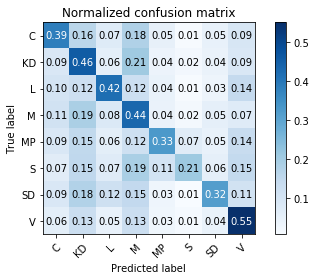

In [153]:
# Plot normalized confusion matrix
plot_confusion_matrix(test_data["party"], predicted_balanced, classes = parties, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

## Problem 6: Grid search

Until now, you have been **using** the vectorizer and the Naive Bayes classifier with their **default hyperparameters**. When working with real-world applications, you would **want** to find settings for the **hyperparameters** that **maximize** the **performance** for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. (Why would that be a bad idea?) Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

**Implement** a **grid search** with **5-fold cross-validation** to **find** the **optimal parameters** in a grid defined by the following choices for the hyperparameters:

* In the **vectorizer**, try a **set-of-words model** instead of the default bag-of-words model (two possible parameter values).
* Also in the **vectorizer**, try extracting **$n$-grams** up to $n = 2$ (**two possible parameter values**).
* In the **Naive Bayes classifier**, try using **additive smoothing** with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library. **Print** the results of your **best model**, along **with** the **parameter values** that yielded these results.

In [154]:
# TODO: Write code here to implement the grid search
from sklearn.model_selection import GridSearchCV

In [193]:
# set the parameters
# - vectorizer binary=False/True
# - vectorizer ngram_range =(1, 1)
# - 
parameters = {
    'vect__binary': (True, False),
    'vect__ngram_range': [(1, 1), (1, 2)],
    #'tfidf__use_idf': (True, False),
    'clf__alpha': (1, 0.1),
}

In [194]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, iid=False, n_jobs=-1)

In [195]:
gs_clf = gs_clf.fit(balanced_data.words, balanced_data.party)

In [197]:
gs_clf

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'vect__binary': (True, False), 'vect__ngram_range': [(1, 1), (1, 2)], 'clf__alpha': (1, 0.1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [198]:
gs_clf.best_score_

0.6808056526806526

In [199]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.1
vect__binary: True
vect__ngram_range: (1, 2)


In [200]:
# make prediction
predicted_balanced_naivebayes = gs_clf.predict(test_data["words"])
predicted_balanced_naivebayes

array(['L', 'S', 'M', ..., 'S', 'M', 'S'], dtype='<U2')

In [219]:
# use classification report - precision, recall, F1 score, overfall accuracy
mean_pred_balanced_naivebayes = round(np.mean(predicted_balanced_naivebayes == test_data["party"]),3)
print("The accuracy of the balanced data set is: {}".format(mean_pred_balanced_naivebayes))


The accuracy of the balanced data set is: 0.411


Confusion matrix, without normalization
[[299  78  46  97  31  13  39  68]
 [ 61 376  45 153  41  23  50  72]
 [ 58  60 247  64  29   6  34  62]
 [213 270 141 707  73  34  90 116]
 [ 64  81  47  71 321  74  36 115]
 [170 293 179 357 398 867 117 392]
 [ 75 162 112 158  22  16 406 109]
 [ 48  80  39  96  28  15  47 597]]


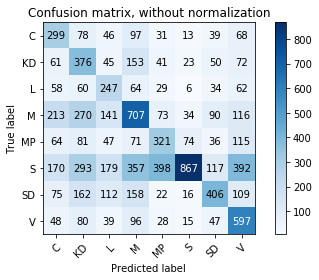

In [224]:
plot_confusion_matrix(test_data["party"], predicted_balanced_naivebayes, classes = parties)
plt.show()

If we would train the hyperparameters in the test set, we would lose the information from before.

## Problem 7: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it **includes** different types of **logistic regression classifiers, support vector machines, and decision trees**. Browse the library to see which methods are supported.

**Build** a **pipeline** that you find interesting, and use **grid search** to **find optimal settings for** the **hyperparameters**. **Print** the **results** of your **best model**. Did you manage to get better results than the ones that you obtained in Problem&nbsp;5? Answer with a short text.

In [165]:
# TODO: Write code here to search for a better model
from sklearn.linear_model import LogisticRegression

In [180]:
## I copy pasted the whole code section of problem 2 in this cell

# Step 1: vectorize speeches of train data
# Step 2: instantiate and fit Bayes model
text_clf2 = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', LogisticRegression()),
])

parameters = {
    'vect__binary': (True, False),
    'vect__ngram_range': [(1, 1), (1, 2)],
    #'tfidf__use_idf': (True, False),
    'clf__solver': ('newton-cg', 'lbfgs', 'liblinear'),
}

In [181]:
gs_clf2 = GridSearchCV(text_clf2, parameters, cv=5, iid=False, n_jobs=-1)

In [182]:
gs_clf2 = gs_clf2.fit(balanced_data.words, balanced_data.party)

In [184]:
gs_clf2.best_score_

0.6592681623931623

In [186]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf2.best_params_[param_name]))

clf__solver: 'newton-cg'
vect__binary: True
vect__ngram_range: (1, 2)


In [189]:
# make prediction with the trained logistic regression classifier
predicted_balanced_logisticregression = gs_clf2.predict(test_data["words"])
predicted_balanced_logisticregression

array(['L', 'SD', 'MP', ..., 'S', 'M', 'S'], dtype=object)

In [222]:
# use classification report - precision, recall, F1 score, overfall accuracy
mean_pred_balanced_logisticregression = round(np.mean(predicted_balanced_logisticregression == test_data["party"]),3)
print("The accuracy of the logistic regression with the balanced data set is: {}".format(mean_pred_balanced_logisticregression))


The accuracy of the logistic regression with the balanced data set is: 0.447


Confusion matrix, without normalization
[[ 295   39   47   64   64   43   66   53]
 [  59  303   52  146   68   50   87   56]
 [  42   35  255   59   40   26   45   58]
 [ 174  162  151  570  150  104  185  148]
 [  35   46   38   30  385  145   63   67]
 [ 106  137  136  191  507 1193  234  269]
 [  63   68   79  103   52   31  597   67]
 [  47   57   45   85   45   33   84  554]]


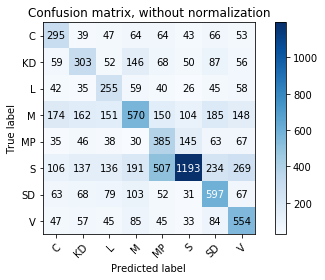

In [223]:
plot_confusion_matrix(test_data["party"], predicted_balanced_logisticregression, classes = parties)
plt.show()

**Interpretation**

I'm comparing the results from 6 and 7.
Thus I compare the results of the Naive Bayes classifier with regulated hyperparameters and the logistic regression classifier with regulated hyperparameters. 
In accruacy the logistic regression shows a better result. 
Accordingly, the confusion matrix of the logistic regression looks better. As before, the diagonal represents the **true positive** values. The other values around it look very clean, by this I mean that less misclassification is present. 
**So it can be said that logistic regression with regulated hyperparameters is the better model for this lab.**

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>

**Useful links**:

Theory

https://medium.com/@paritosh_30025/natural-language-processing-text-data-vectorization-af2520529cf7
https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/
https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c

Sklearn

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
https://scikit-learn.org/stable/modules/feature_extraction.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


Evaluation

https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

Undersampling

https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-i-under-sampling-a8dbc3d8d6d8
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

Pipeline

https://towardsdatascience.com/3-basic-approaches-in-bag-of-words-which-are-better-than-word-embeddings-c2cbc7398016